In [1]:
import cv2
import detectron2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog
import matplotlib.pyplot as plt
import os, json, random
from detectron2.utils.visualizer import Visualizer

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


from detectron2.data.datasets import register_coco_instances
register_coco_instances("sketches_train", {}, "data/train_annotations.coco.json", "data/train")

register_coco_instances("sketches_test", {}, "data/test_annotations.coco.json", "data/test")

train_metadata = MetadataCatalog.get("sketches_train")
train_dataset_dicts = DatasetCatalog.get("sketches_train")

test_metadata = MetadataCatalog.get("sketches_test")
test_dataset_dicts = DatasetCatalog.get("sketches_test")


In [20]:
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
# cfg.DATASETS.TRAIN = ("sketches_train",)
# cfg.DATASETS.TEST = ("sketches_test") 
    
# we don't need these weights, because we have our weight already which we have trained
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")


# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.SOLVER.BASE_LR = 0.001
# cfg.SOLVER.MAX_ITER = 20000
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 32
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 14
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = os.path.join("output2", "model_final.pth")
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

In [21]:
# from detectron2.evaluation import COCOEvaluator, inference_on_dataset
# from detectron2.data import build_detection_test_loader

# evaluator = COCOEvaluator("sketches_test", output_dir="./output")
# val_loader = build_detection_test_loader(cfg, "sketches_test")

# print(inference_on_dataset(predictor.model, val_loader, evaluator))

Boxes(tensor([[330.1971, 405.8271, 468.2021, 451.9906],
        [234.0603, 225.3734, 462.8550, 268.5015],
        [ 18.3724, 229.7249, 216.5000, 271.8834],
        [ 25.7771, 319.3070, 220.7845, 357.0180],
        [ 14.4140, 137.1994, 215.2038, 182.5656],
        [236.8275, 126.4758, 465.6056, 176.8027],
        [240.9618, 307.2500, 465.3017, 349.8345],
        [160.9530,  26.1700, 223.9580,  69.5246],
        [ 39.4249, 381.8267, 210.1778, 419.9803]], device='cuda:0'))
[ 1 14 14 14 14 14 14  6  3]


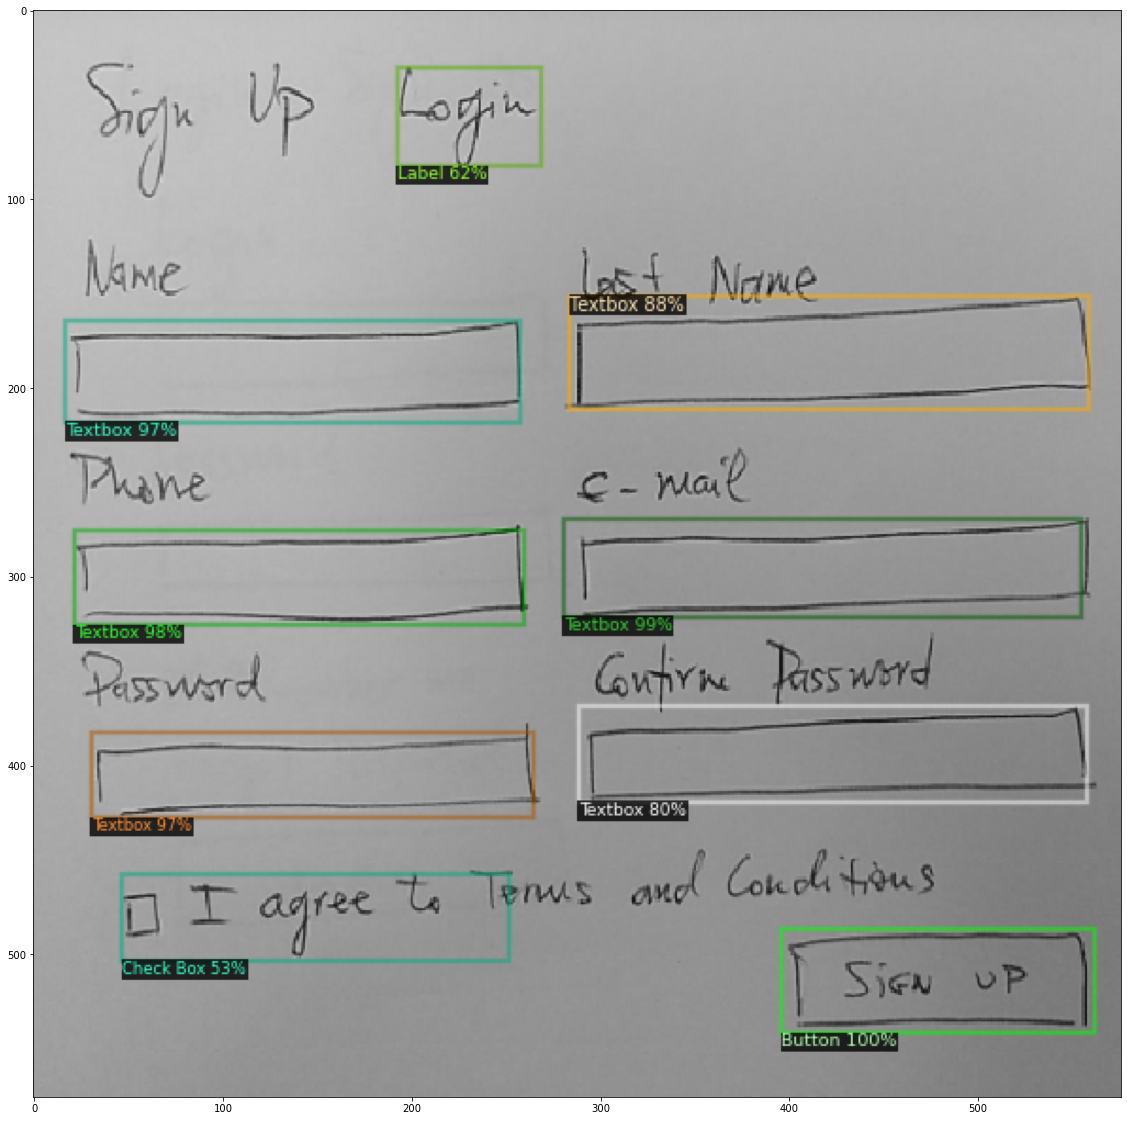

In [22]:
from detectron2.utils.visualizer import ColorMode
import numpy as np

image = cv2.imread(f"test_imges\\image2.jpg")

img = cv2.resize(image, (480, 480))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

output = predictor(img)
v = Visualizer(img, test_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)

out = v.draw_instance_predictions(output["instances"].to("cpu"))
print(output["instances"].pred_boxes)
print(np.array(output["instances"].pred_classes.to("cpu"))+1)
plt.figure(figsize=(20,20))
plt.imshow(out.get_image())


In [6]:
len(output["instances"].pred_boxes)

14

ValueError: zero-size array to reduction operation minimum which has no identity

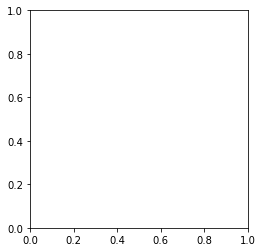

In [7]:

# [ 81.4583,  58.7387, 270.2391, 115.6710]

# Basically it selects number of rows (58 to 115) and number of columns in that rows (81 to 270). S we can also put it like
# top-left: X=81,Y=58 and bottom right: X=270,Y=115

#  [265.9618, 229.7002, 348.7201, 257.8487]
img1 = img[229:257, 265:229]
# img1 = img[58:115, 81:270]  # In this, first 2 are Y axis and other 2 are X axis.

# [ 70.5340, 393.1627, 268.1833, 461.1835]
# img1 = img[393:461, 70:268]
plt.imshow(img1)

In [97]:
def randomId():
    import random
    return random.randint(10, 10000)

# print(randomId())

boxes = output["instances"].pred_boxes

def generate(element, box, idx):
    
    boxes = []
    for b in box:
        boxes.append(np.array(b.to("cpu")))
    
    
    element_dict = {

        1: f'<div><button type="button">Buttton</button></div>',
        2: '<div><button type="button">Buttton</button></div>',
        3: '<div><input type="checkbox" id="practical" name="practical" value="Checkbox"></div>',
        4: '<div><h1>Headings Here...</h1></div>',
        5: f'<div><img src="" alt="You can change alternate values" width="{abs(int(boxes[idx][0] - boxes[idx][2]))}" height="{abs(int(boxes[idx][1] - boxes[idx][3]))}"></div>',
        6: '<div><button type="button">Buttton</button></div>',
        7: '<div><button type="button">Buttton</button></div>',
        8: '<div><button type="button">Buttton</button></div>',
        9: '<div><p> Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua</p></div>',
        10: '<div><button type="button">Buttton</button></div>',
        11: f'<div><select name="select_tag" id="{randomId()}"></select></div>',
        12: '<div><button type="button">Buttton</button></div>',
        13: '<div><button type="button">Buttton</button></div>',
        14: '<div><button type="button">Buttton</button></div>',

    }
    
    return element_dict[element]

In [98]:
print(np.array(output["instances"].pred_boxes.to("cpu")))

[tensor([179.1334, 394.9150, 261.3009, 453.7735])
 tensor([301.9133, 390.2298, 380.9284, 451.8928])
 tensor([ 66.2409, 398.8424, 136.4293, 452.5399])
 tensor([297.0311, 251.2657, 356.7442, 332.9830])
 tensor([ 63.6168, 245.8559, 123.6102, 333.0191])
 tensor([177.3376, 252.7899, 235.0001, 334.0047])]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\2723650497.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  print(np.array(output["instances"].pred_boxes.to("cpu")))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\2723650497.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(output["instances"].pred_boxes.to("cpu")))


In [100]:
classes =  np.array(output["instances"].pred_classes.to("cpu")) + 1

idx = 0
for clas in classes:
    print(clas)
    html_element = generate(clas, boxes, idx)
    print(html_element)
    with open("sample.html", "a") as f:
        f.write(html_element)
    idx += 1

9
<div><p> Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua</p></div>
9
<div><p> Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua</p></div>
9
<div><p> Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua</p></div>
5
<div><img src="" alt="You can change alternate values" width="59" height="81"></div>
5
<div><img src="" alt="You can change alternate values" width="59" height="87"></div>
5
<div><img src="" alt="You can change alternate values" width="57" height="81"></div>
